In [ ]:
!unzip "/content/drive/MyDrive/Alzheimer_s Dataset.zip"

In [ ]:
!pip install fastai

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Set path to root directory
path = Path('/content/Alzheimer_s Dataset')
# View all files in directory
path.ls()

[PosixPath('/content/Alzheimer_s Dataset/train'),
 PosixPath('/content/Alzheimer_s Dataset/test')]

In [5]:
data = ImageDataBunch.from_folder(path, train='train', valid='test', ds_tfms=get_transforms(do_flip=False), size=224, bs=64, num_workers=8)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'] 4
5121 1279


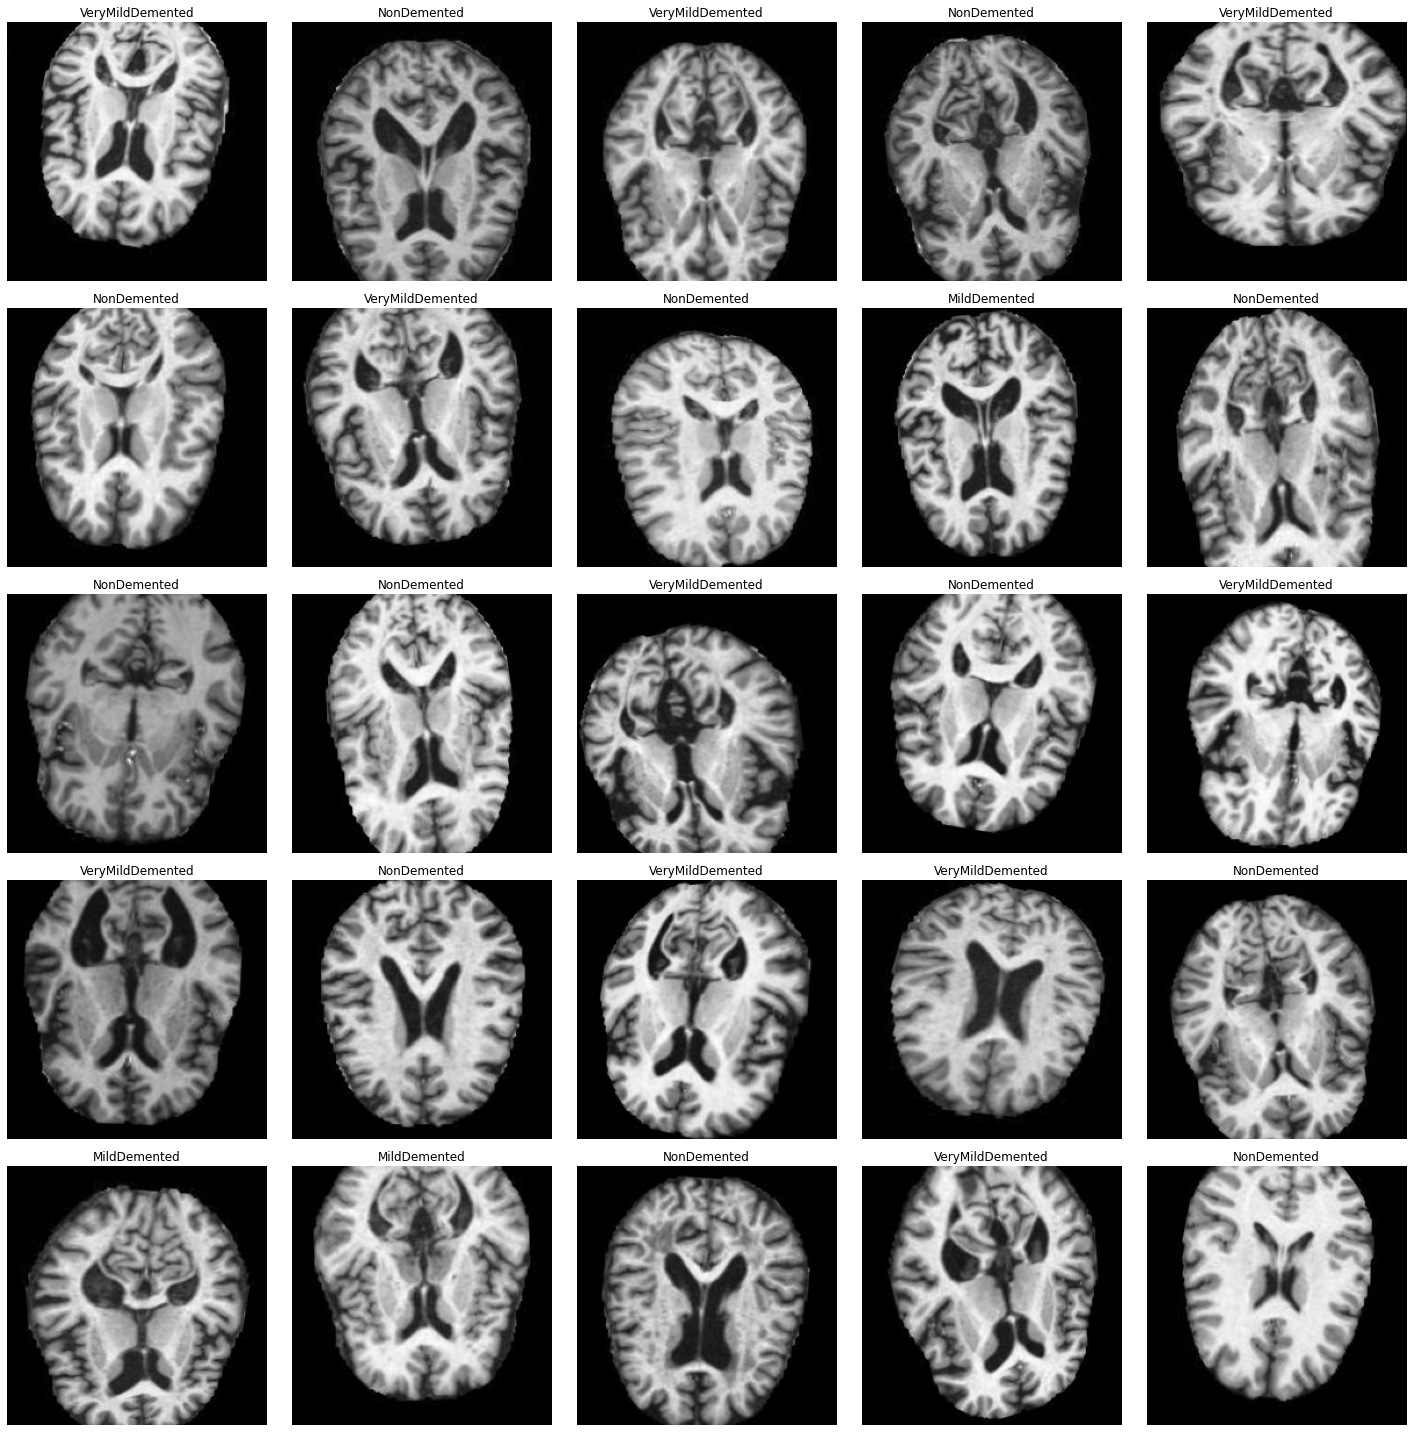

In [6]:
# Show what the data looks like after being transformed
data.show_batch()
# See the classes and count of classes in your dataset
print(data.classes,data.c)
# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

In [7]:
# Build the CNN model with the pretrained resnet34
# Error rate = 1 - accuracy
learn = cnn_learner(data, models.resnet50, metrics = [accuracy])
# Train the model on 4 epochs of data at the default learning rate
learn.fit_one_cycle(20)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.955731,1.486237,0.488663,00:48
1,1.667098,1.122651,0.562158,00:47
2,1.311734,1.104490,0.587959,00:46
3,1.024683,0.856744,0.616888,00:46
4,0.889008,0.937173,0.564503,00:46
5,0.824600,0.835811,0.622361,00:46
6,0.781146,0.912501,0.605160,00:46
7,0.722557,0.806146,0.642690,00:46
8,0.673108,0.781395,0.668491,00:46
9,0.616476,0.859224,0.660672,00:46


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-05
Min loss divided by 10: 1.10E-05


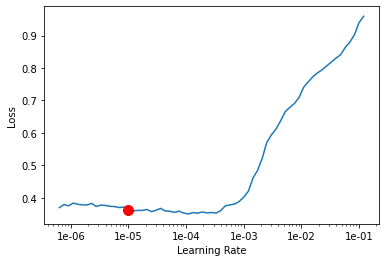

In [8]:
# Unfreeze all layers of the CNN
learn.unfreeze()
# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [9]:
# Fit the model over 10 epochs
learn.fit_one_cycle(10, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.345178,0.703857,0.712275,01:01
1,0.317206,0.781747,0.716184,01:00
2,0.279393,0.701471,0.735731,01:01
3,0.221552,0.767539,0.733385,01:00
4,0.183110,0.732569,0.765442,01:01
5,0.145290,0.785269,0.743550,01:01
6,0.109036,0.712914,0.764660,01:00
7,0.093395,0.750195,0.765442,01:01
8,0.084897,0.756773,0.757623,01:00
9,0.075418,0.772706,0.751368,01:01


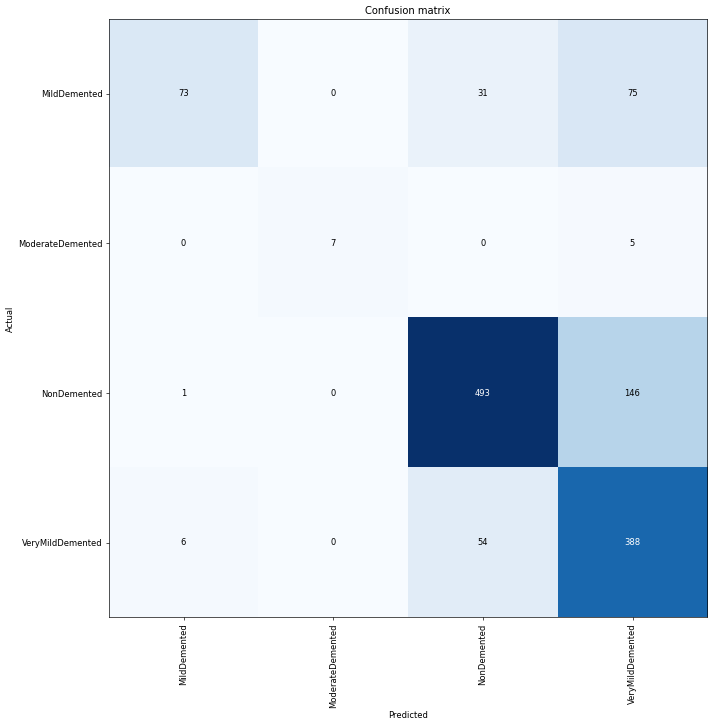

In [10]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)